In [102]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
np.random.seed(400)

In [2]:
amazon = pd.read_csv('./amazon_cells_labelled.txt', sep='\t', header=None)
imdb = pd.read_csv('./imdb_labelled.txt', sep='\t', header=None)
yelp = pd.read_csv('./yelp_labelled.txt', sep='\t', header=None)

## Tweeter source
SemEval 4b:
http://alt.qcri.org/semeval2017/task4/index.php?id=data-and-tools

In [167]:
tweets = pd.read_csv('./tweets.txt', sep='\t', header=None)
tweets_text = [re.sub(r"http\S+", "", line) for line in tweets[3]]
tweets_labels = (tweets[2]=='positive').astype(int)

df = pd.DataFrame(data={'text':tweets_text, 'label':tweets_labels})
pos_tweets = df[df['label']==1][:100]
neg_tweets = df[df['label']==0]

tweets = pd.concat([pos_tweets, neg_tweets], axis=0)
tweets.columns=[0, 1]

In [4]:
import nltk
import pandas as pd
import numpy as np
import string
from collections import defaultdict

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

In [5]:
from wordcloud import WordCloud, STOPWORDS 

In [6]:
def draw_wordcloud(text_data, stopwords=None):
    words = ' '
    for line in text_data:
        for word in line:
            words = words + word + ' '

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(words) 

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [7]:
def lower_tokenize(text_data):
    text_data = [entry.lower() for entry in text_data]
    text_data = [word_tokenize(entry) for entry in text_data]
    return text_data

# Wstępna analiza

In [8]:
amazon

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


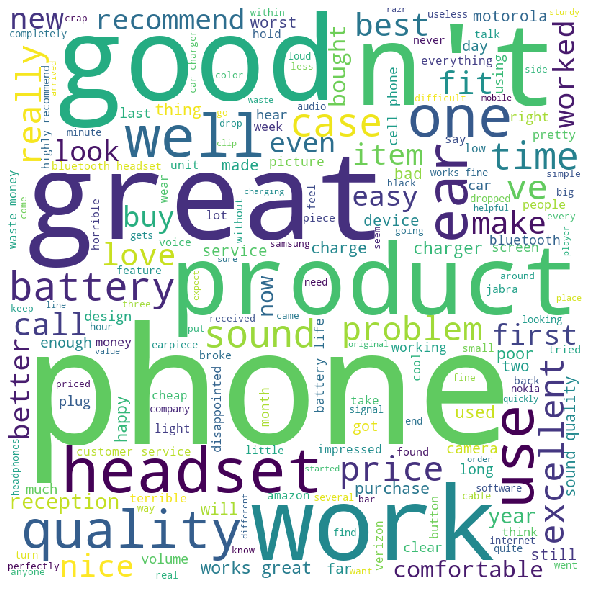

In [9]:
amazon_text = lower_tokenize(amazon[0])
draw_wordcloud(amazon_text)

In [10]:
imdb

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


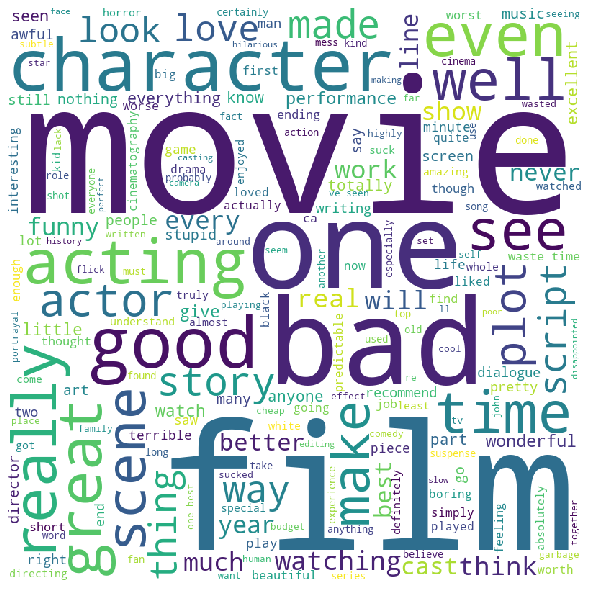

In [11]:
imdb_text = lower_tokenize(imdb[0])
draw_wordcloud(imdb_text, stopwords=STOPWORDS.add('n\'t'))

In [12]:
yelp

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


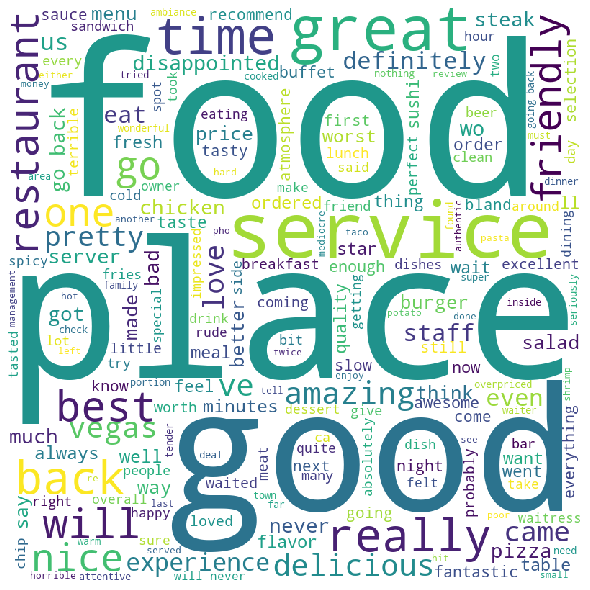

In [13]:
yelp_text = lower_tokenize(yelp[0])
draw_wordcloud(yelp_text)#, stopwords=STOPWORDS.add('n\'t'))

In [195]:
tweets

,0,1
13,#SNL Well it's a good thing I stumbled upon Ma...,1
14,'Amy Schumer' appeared on Monday 30 at the 13t...,1
15,...1st of all this is Amy Schumer and she's fu...,1
16,41 Amy Schumer quotes to get you through Wedne...,1
17,AMY SCHUMER TICKETS STILL AVAILABLE for SUNDAY...,1
...,...,...
10439,Well with Zayn joining ISIS it is hard to main...,0
10440,"Well, now that I think of it I'm gonna sleep a...",0
10441,What was the need to @ ZAYN? How thirsty are y...,0
10442,Wtf! I'm happy to see the video and all but wh...,0


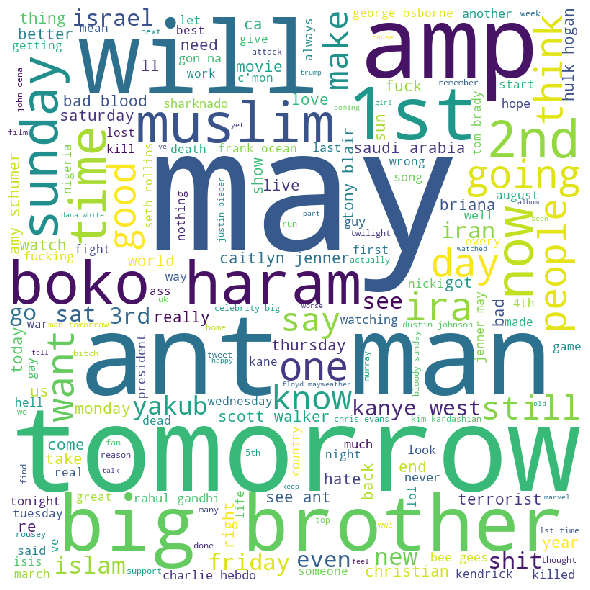

In [162]:
tweeter_text = lower_tokenize(tweets[0])
draw_wordcloud(tweeter_text, stopwords=STOPWORDS.add('n\'t'))

In [194]:
print(np.count_nonzero(amazon[1])/amazon.shape[0])
print(np.count_nonzero(imdb[1])/imdb.shape[0])
print(np.count_nonzero(yelp[1])/yelp.shape[0])
print(np.count_nonzero(tweets[1])/tweets.shape[0])

0.5
0.516042780748663
0.5
0.04100041000410004


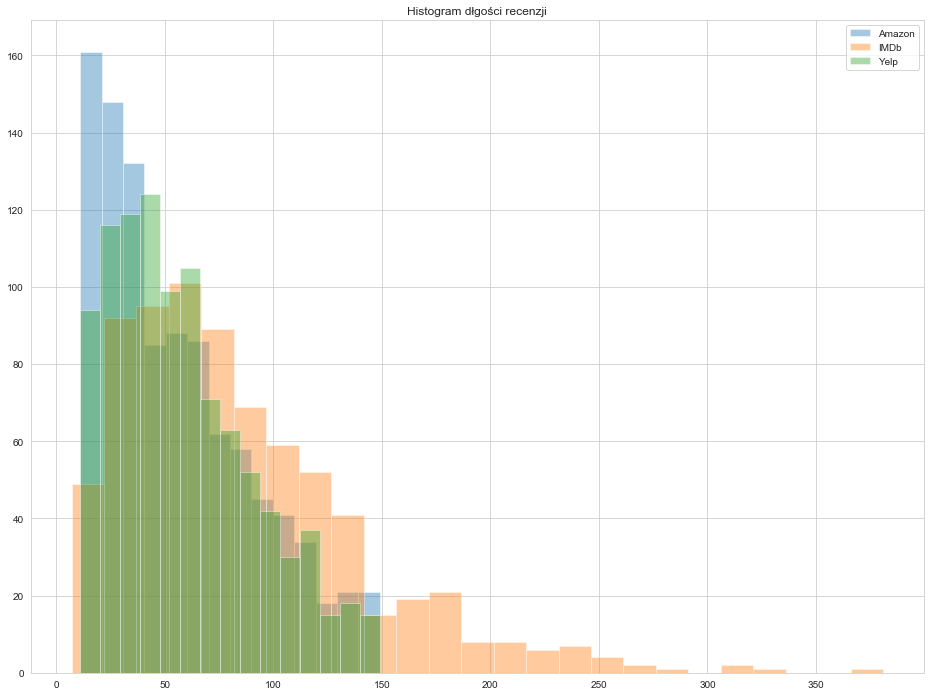

In [15]:
plt.figure(figsize=(16,12))

sns.set_style("whitegrid")
am_lens = list(map(len, amazon[0]))
sns.distplot(am_lens, kde=False)

im_lens = [ i for i in list(map(len, imdb.drop(index=136, axis=0)[0])) if i < 400]
#plt.xlim([0, 500])
sns.distplot(im_lens, kde=False)

ye_lens = list(map(len, yelp[0]))
sns.distplot(ye_lens, kde=False)


plt.title("Histogram dłgości recenzji")
plt.legend(["Amazon", "IMDb", "Yelp"])

In [16]:
np.mean(am_lens)

55.226

In [17]:
np.mean(list(map(len, imdb.drop(index=136, axis=0)[0])))

100.50066934404283

In [18]:
np.mean(ye_lens)

58.316

In [19]:
[ i for i in list(map(len, imdb.drop(index=136, axis=0)[0])) if i > 400]

[4778, 1053, 1562, 479, 4487]

In [20]:
amazon[0]

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk.. I lose more calls on th...
997                         Item Does Not Match Picture.
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit, never ...
Name: 0, Length: 1000, dtype: object

# Built-in preprocessing + different classifiers

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
nb_classifier = MultinomialNB()
svc_classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
forest_classifier = RandomForestClassifier(n_estimators=100)
xgb_classifier = XGBClassifier()
tree_classifier = DecisionTreeClassifier()
logreg_classifier = LogisticRegression(solver='lbfgs')

In [168]:
def evaluate_pre_class(text, labels, preprocessor, classifier):
    transformed = preprocessor.fit_transform(text)
    X_train, X_test, y_train, y_test = train_test_split(transformed, labels, test_size=0.33, random_state=43)
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions, average='binary')
    accuracy = classifier.score(X_test, y_test)
    return (accuracy, precision, recall, fscore)

In [169]:
datasets = {'Amazon':amazon, 'IMDb': imdb, 'Yelp':yelp, 'Tweeter':tweets}
preprocessors = {'CountVectorizer': CountVectorizer(), 'Tfidf': TfidfVectorizer()}
classifiers = {'NaiveBayes': nb_classifier, 'Support Vector Machine': svc_classifier, 'Decision Tree':tree_classifier, 'Random Forest': forest_classifier, 'XGBoost':xgb_classifier, 'logreg_classifier':logreg_classifier}

In [170]:
basic_results = pd.DataFrame(columns=['Dataset', 'Vectorizer', 'Classifier', 'Accuracy', 'Precision', 'Recall', 'Fscore'])
for dataset in datasets:
    for preprocessor in preprocessors:
        for classifier in classifiers:
            (accuracy, precision, recall, fscore) = evaluate_pre_class(\
                                                                                datasets[dataset][0],
                                                                                datasets[dataset][1],
                                                                                preprocessors[preprocessor],
                                                                                classifiers[classifier])
            basic_results = basic_results.append(\
                                                 {'Dataset': dataset,
                                                  'Vectorizer': preprocessor,
                                                  'Classifier': classifier,
                                                  'Accuracy': accuracy,
                                                  'Precision': precision,
                                                  'Recall': recall,
                                                  'Fscore': fscore}, 
                                                 ignore_index=True)
            
            

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [171]:
basic_results

,Dataset,Vectorizer,Classifier,Accuracy,Precision,Recall,Fscore
0,Amazon,CountVectorizer,NaiveBayes,0.821212,0.819767,0.834320,0.826979
1,Amazon,CountVectorizer,Support Vector Machine,0.809091,0.808140,0.822485,0.815249
2,Amazon,CountVectorizer,Decision Tree,0.754545,0.809859,0.680473,0.739550
3,Amazon,CountVectorizer,Random Forest,0.800000,0.850340,0.739645,0.791139
4,Amazon,CountVectorizer,XGBoost,0.718182,0.816667,0.579882,0.678201
5,Amazon,CountVectorizer,logreg_classifier,0.815152,0.855263,0.769231,0.809969
6,Amazon,Tfidf,NaiveBayes,0.809091,0.797753,0.840237,0.818444
7,Amazon,Tfidf,Support Vector Machine,0.803030,0.846667,0.751479,0.796238
8,Amazon,Tfidf,Decision Tree,0.733333,0.804511,0.633136,0.708609
9,Amazon,Tfidf,Random Forest,0.809091,0.878571,0.727811,0.796117


In [190]:
basic_results.groupby('Dataset').mean()

,Accuracy,Precision,Recall,Fscore
Dataset,,,,
Amazon,0.784596,0.835442,0.723373,0.771898
IMDb,0.705466,0.729188,0.721805,0.724713
Tweeter,0.982402,0.832883,0.594444,0.620557
Yelp,0.795455,0.776255,0.788961,0.780813


In [191]:
basic_results.groupby(['Dataset', 'Vectorizer']).mean()

Accuracy  Precision    Recall    Fscore
Dataset Vectorizer                                              
Amazon  CountVectorizer  0.786364   0.826673  0.737673  0.776848
        Tfidf            0.782828   0.844211  0.709073  0.766949
IMDb    CountVectorizer  0.705803   0.738647  0.708020  0.722428
        Tfidf            0.705128   0.719729  0.735589  0.726998
Tweeter CountVectorizer  0.985093   0.880316  0.683333  0.720818
        Tfidf            0.979710   0.785450  0.505556  0.520297
Yelp    CountVectorizer  0.787374   0.770520  0.774892  0.770605
        Tfidf            0.803535   0.781991  0.803030  0.791021

In [70]:
basic_results.groupby(['Dataset', 'Classifier']).mean()

Accuracy  Precision    Recall    Fscore
Dataset Classifier                                                     
Amazon  Decision Tree           0.746970   0.758744  0.749430  0.745196
        NaiveBayes              0.815152   0.815668  0.814602  0.814798
        Random Forest           0.783333   0.791974  0.785301  0.782442
        Support Vector Machine  0.806061   0.807900  0.806535  0.805845
        XGBoost                 0.724242   0.751461  0.728050  0.718734
        logreg_classifier       0.816667   0.821334  0.818066  0.816367
IMDb    Decision Tree           0.607287   0.606047  0.606203  0.605609
        NaiveBayes              0.781377   0.782206  0.782268  0.780564
        Random Forest           0.694332   0.692466  0.692043  0.692202
        Support Vector Machine  0.732794   0.733249  0.730890  0.730817
        XGBoost                 0.651822   0.650433  0.651003  0.650438
        logreg_classifier       0.732794   0.732953  0.729950  0.730222
Yelp    Decision Tree           0.759091   0.759140  0.756291  0.756900
        NaiveBayes              0.818182   0.822153  0.821834  0.818140
        Random Forest           0.810606   0.810198  0.809659  0.809609
        Support Vector Machine  0.822727   0.823067  0.824269  0.822539
        XGBoost                 0.766667   0.770066  0.761567  0.762717
        logreg_classifier       0.819697   0.819447  0.820820  0.819436

In [60]:
basic_results.groupby(['Classifier']).mean()

,Accuracy
Classifier,
Decision Tree,0.709678
NaiveBayes,0.804903
Random Forest,0.766139
Support Vector Machine,0.787194
XGBoost,0.714244
logreg_classifier,0.789719


In [100]:
for tree_length in range(3, 17):
    print(f'\nResult for tree of depth {tree_length}')
    print(evaluate_pre_class(yelp[0], yelp[1], CountVectorizer(), DecisionTreeClassifier(max_depth=tree_length)))


Result for tree of depth 3
0.6575757575757576

Result for tree of depth 4
0.6636363636363637

Result for tree of depth 5
0.6909090909090909

Result for tree of depth 6
0.7121212121212122

Result for tree of depth 7
0.7303030303030303

Result for tree of depth 8
0.7181818181818181

Result for tree of depth 9
0.7515151515151515

Result for tree of depth 10
0.7484848484848485

Result for tree of depth 11
0.7545454545454545

Result for tree of depth 12
0.7545454545454545

Result for tree of depth 13
0.7666666666666667

Result for tree of depth 14
0.7696969696969697

Result for tree of depth 15
0.7515151515151515

Result for tree of depth 16
0.7575757575757576


### Testing other datasets with classifier trained on one of them

In [172]:
def evaluate_whole_corpus(corpus, train_dataset, test_dataset, preprocessor, classifier):
    preprocessor.fit(corpus)
    train_transformed = preprocessor.transform(train_dataset[0])
    X_train, X_test, y_train, y_test = train_test_split(train_transformed, train_dataset[1], test_size=0.33, random_state=43)
    classifier.fit(X_train, y_train)        
    
    test_transformed = preprocessor.transform(test_dataset[0])
    X_train, X_test, y_train, y_test = train_test_split(test_transformed, test_dataset[1], test_size=0.33, random_state=43)
    
    predictions = classifier.predict(X_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions, average='binary')
    accuracy = classifier.score(X_test, y_test)
    return (accuracy, precision, recall, fscore)

In [174]:
results_whole = pd.DataFrame(columns=['Train dataset', 'Test dataset', 'Vectorizer', 'Classifier', 'Accuracy', 'Precision', 'Recall', 'Fscore'])

joined_reviews = np.concatenate((amazon[0], imdb[0], yelp[0], tweets[0]))

for train_dataset in datasets:
    for preprocessor in preprocessors:
        for classifier in classifiers:
            for test_dataset in datasets:
                # print(f"Accuracy for data set {test_dataset}, vectorized by {preprocessor}, classified by {classifier} trained on {train_dataset}")
                accuracy, precision, recall, fscore = evaluate_whole_corpus(joined_reviews, datasets[train_dataset], datasets[test_dataset], preprocessors[preprocessor], classifiers[classifier])
                results_whole = results_whole.append({\
                                                      'Train dataset':train_dataset,
                                                      'Test dataset':test_dataset,
                                                      'Vectorizer':preprocessor, 
                                                      'Classifier':classifier,
                                                      'Accuracy': accuracy,
                                                      'Precision': precision,
                                                      'Recall': recall,
                                                      'Fscore': fscore}, 
                                                     ignore_index=True)

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Use

In [175]:
results_whole

,Train dataset,Test dataset,Vectorizer,Classifier,Accuracy,Precision,Recall,Fscore
0,Amazon,Amazon,CountVectorizer,NaiveBayes,0.803030,0.820988,0.786982,0.803625
1,Amazon,IMDb,CountVectorizer,NaiveBayes,0.672065,0.754902,0.578947,0.655319
2,Amazon,Yelp,CountVectorizer,NaiveBayes,0.703030,0.718750,0.597403,0.652482
3,Amazon,Tweeter,CountVectorizer,NaiveBayes,0.829814,0.091603,0.400000,0.149068
4,Amazon,Amazon,CountVectorizer,Support Vector Machine,0.809091,0.808140,0.822485,0.815249
...,...,...,...,...,...,...,...,...
187,Tweeter,Tweeter,Tfidf,XGBoost,0.993789,0.903226,0.933333,0.918033
188,Tweeter,Amazon,Tfidf,logreg_classifier,0.487879,0.000000,0.000000,0.000000
189,Tweeter,IMDb,Tfidf,logreg_classifier,0.461538,0.000000,0.000000,0.000000
190,Tweeter,Yelp,Tfidf,logreg_classifier,0.533333,0.000000,0.000000,0.000000


In [176]:
results_whole.groupby(['Train dataset', 'Test dataset']).max()

Vectorizer         Classifier  Accuracy  Precision  \
Train dataset Test dataset                                                      
Amazon        Amazon            Tfidf  logreg_classifier  0.818182   0.860140   
              IMDb              Tfidf  logreg_classifier  0.680162   0.790123   
              Tweeter           Tfidf  logreg_classifier  0.941615   0.185185   
              Yelp              Tfidf  logreg_classifier  0.733333   0.857143   
IMDb          Amazon            Tfidf  logreg_classifier  0.712121   0.753846   
              IMDb              Tfidf  logreg_classifier  0.797571   0.829268   
              Tweeter           Tfidf  logreg_classifier  0.617391   0.064327   
              Yelp              Tfidf  logreg_classifier  0.700000   0.680328   
Tweeter       Amazon            Tfidf  logreg_classifier  0.490909   1.000000   
              IMDb              Tfidf  logreg_classifier  0.465587   1.000000   
              Tweeter           Tfidf  logreg_classifier  0.995031   1.000000   
              Yelp              Tfidf  logreg_classifier  0.533333   0.000000   
Yelp          Amazon            Tfidf  logreg_classifier  0.757576   0.806897   
              IMDb              Tfidf  logreg_classifier  0.704453   0.745902   
              Tweeter           Tfidf  logreg_classifier  0.791304   0.068750   
              Yelp              Tfidf  logreg_classifier  0.842424   0.822785   

                              Recall    Fscore  
Train dataset Test dataset                      
Amazon        Amazon        0.852071  0.827586  
              IMDb          0.578947  0.655319  
              Tweeter       0.600000  0.181818  
              Yelp          0.681818  0.704698  
IMDb          Amazon        0.751479  0.712991  
              IMDb          0.842105  0.817518  
              Tweeter       0.766667  0.118280  
              Yelp          0.785714  0.709677  
Tweeter       Amazon        0.011834  0.022989  
              IMDb          0.007519  0.014925  
              Tweeter       1.000000  0.937500  
              Yelp          0.000000  0.000000  
Yelp          Amazon        0.786982  0.756757  
              IMDb          0.684211  0.713725  
              Tweeter       0.566667  0.115789  
              Yelp          0.915584  0.833333

In [177]:
results_whole.groupby(['Train dataset', 'Classifier'])['Accuracy'].mean()

Train dataset  Classifier            
Amazon         Decision Tree             0.697407
               NaiveBayes                0.756524
               Random Forest             0.749420
               Support Vector Machine    0.738142
               XGBoost                   0.717507
               logreg_classifier         0.750784
IMDb           Decision Tree             0.562398
               NaiveBayes                0.676526
               Random Forest             0.633710
               Support Vector Machine    0.663760
               XGBoost                   0.613551
               logreg_classifier         0.669272
Tweeter        Decision Tree             0.620203
               NaiveBayes                0.611964
               Random Forest             0.612924
               Support Vector Machine    0.619514
               XGBoost                   0.619669
               logreg_classifier         0.615098
Yelp           Decision Tree             0.683524
            

# Preprocessing pipeline

In [179]:
def remove_punctuation(line):
    return "".join([c for c in line if c not in string.punctuation])

def remove_stopwords(line, stopwords = stopwords.words('english')):
    return [w for w in line if w not in stopwords]

def lemmatizer(line, lemmatizer=WordNetLemmatizer()):
    return [lemmatizer.lemmatize(w) for w in line]

def stemmer(line, stemmer=PorterStemmer()):
    return [stemmer.stem(w) for w in line]

def text_pipeline(text_data, punctuation=True, stopwords=True, morph='lemmitizer'):
    
    #Removing punctuation
    if(punctuation):
        transformed = text_data.apply(remove_punctuation)
    else:
        transformed = text_data
    
    tokenizer = RegexpTokenizer(r'\w+')
    transformed = transformed.apply(lambda x: tokenizer.tokenize(x.lower()))
    
    #Removing stop words
    if stopwords:
        transformed = transformed.apply(remove_stopwords)
    
    
    if morph == 'lemmitizer':
        transformed = transformed.apply(lemmatizer)
    elif morph == 'stemmer':
        transformed = transformed.apply(stemmer)
        
        
    return transformed

def dummy(doc):
    return doc

# Evaluation - different preprocessing parameters, different calssifiers

In [180]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, preprocessor=dummy, tokenizer=dummy)
count_vectorizer = CountVectorizer(preprocessor=dummy, tokenizer=dummy)
vectorizers = {"Tfidf":tfidf_vectorizer, "Count Vectorizer": count_vectorizer}

parameters ={'on':True, 'off':False}
morphs = ['lemmitizer', 'stemmer', 'turned off']

In [181]:
def evaluate_pipeline(input_text, labels, classifier, vectorizer, punctuation=True, stopwords=True, morph='lemmitizer'):
    text_data = text_pipeline(input_text, punctuation, stopwords, morph)
    
    vectorizer.fit(text_data)
    transformed = vectorizer.transform(text_data)
    X_train, X_test, y_train, y_test = train_test_split(transformed, labels, test_size=0.33, random_state=43)

    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, predictions, average='binary')
    accuracy = classifier.score(X_test, y_test)
    return (accuracy, precision, recall, fscore)

In [182]:
results = pd.DataFrame(columns=['DataSet', 'Vectorizer', 'Stopword removing', 'Punctuation removing', 'Morphing', 'Classifier', 'Accuracy', 'Precision', 'Recall', 'Fscore'])
for dataset in datasets:
    for classifier in classifiers:
        for vectorizer in vectorizers:
            for punctuation in parameters:
                for stopword in parameters:
                    for morph in morphs:
                        accuracy, precision, recall, fscore = evaluate_pipeline(datasets[dataset][0], datasets[dataset][1], classifiers[classifier], vectorizers[vectorizer], punctuation=parameters[punctuation], stopwords=parameters[stopword], morph=morph)
                        results = results.append({\
                                                  'DataSet':dataset,
                                                  'Vectorizer':vectorizer,
                                                  'Stopword removing':stopword,
                                                  'Punctuation removing':punctuation,
                                                  'Morphing':morph,
                                                  'Classifier':classifier,
                                                  'Accuracy': accuracy,
                                                  'Precision': precision,
                                                  'Recall': recall,
                                                  'Fscore': fscore}, 
                                                  ignore_index=True)

/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/hook/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Use

In [183]:
results

,DataSet,Vectorizer,Stopword removing,Punctuation removing,Morphing,Classifier,Accuracy,Precision,Recall,Fscore
0,Amazon,Tfidf,on,on,lemmitizer,NaiveBayes,0.778788,0.747423,0.857988,0.798898
1,Amazon,Tfidf,on,on,stemmer,NaiveBayes,0.809091,0.767677,0.899408,0.828338
2,Amazon,Tfidf,on,on,turned off,NaiveBayes,0.793939,0.764398,0.863905,0.811111
3,Amazon,Tfidf,off,on,lemmitizer,NaiveBayes,0.793939,0.775956,0.840237,0.806818
4,Amazon,Tfidf,off,on,stemmer,NaiveBayes,0.821212,0.795699,0.875740,0.833803
...,...,...,...,...,...,...,...,...,...,...
571,Tweeter,Count Vectorizer,on,off,stemmer,logreg_classifier,0.990062,0.892857,0.833333,0.862069
572,Tweeter,Count Vectorizer,on,off,turned off,logreg_classifier,0.990062,0.892857,0.833333,0.862069
573,Tweeter,Count Vectorizer,off,off,lemmitizer,logreg_classifier,0.993789,0.931034,0.900000,0.915254
574,Tweeter,Count Vectorizer,off,off,stemmer,logreg_classifier,0.993789,0.931034,0.900000,0.915254


In [184]:
results.groupby(['DataSet', 'Vectorizer']).mean()

Accuracy  Precision    Recall    Fscore
DataSet Vectorizer                                               
Amazon  Count Vectorizer  0.770707   0.799127  0.739892  0.764573
        Tfidf             0.766120   0.811199  0.711703  0.754548
IMDb    Count Vectorizer  0.717668   0.748123  0.725773  0.733587
        Tfidf             0.726608   0.742469  0.760234  0.748107
Tweeter Count Vectorizer  0.985317   0.883455  0.695833  0.740939
        Tfidf             0.980366   0.781257  0.526389  0.550899
Yelp    Count Vectorizer  0.776810   0.764167  0.760823  0.758802
        Tfidf             0.782113   0.761588  0.783099  0.768630

In [185]:
results.groupby(['DataSet', 'Stopword removing']).mean()

Accuracy  Precision    Recall    Fscore
DataSet Stopword removing                                         
Amazon  off                0.782955   0.819508  0.741864  0.775583
        on                 0.753872   0.790818  0.709730  0.743538
IMDb    off                0.708446   0.734751  0.716583  0.724726
        on                 0.735830   0.755840  0.769424  0.756967
Tweeter off                0.982591   0.838517  0.593981  0.628669
        on                 0.983092   0.826195  0.628241  0.663169
Yelp    off                0.795749   0.773507  0.795815  0.782829
        on                 0.763173   0.752248  0.748106  0.744603

In [186]:
results.groupby(['DataSet', 'Morphing']).mean()

Accuracy  Precision    Recall    Fscore
DataSet Morphing                                           
Amazon  lemmitizer  0.759659   0.796404  0.716346  0.750572
        stemmer     0.775821   0.804749  0.744699  0.769816
        turned off  0.769760   0.814335  0.716346  0.758293
IMDb    lemmitizer  0.717527   0.738962  0.744518  0.738416
        stemmer     0.733047   0.757019  0.744831  0.748858
        turned off  0.715840   0.739907  0.739662  0.735267
Tweeter lemmitizer  0.982842   0.833398  0.611111  0.646354
        stemmer     0.982893   0.835591  0.611806  0.645926
        turned off  0.982790   0.828079  0.610417  0.645476
Yelp    lemmitizer  0.778283   0.761071  0.772592  0.763152
        stemmer     0.779482   0.763487  0.770022  0.763113
        turned off  0.780619   0.764074  0.773268  0.764884

In [187]:
results.groupby(['DataSet', 'Classifier']).mean()

Accuracy  Precision    Recall    Fscore
DataSet Classifier                                                     
Amazon  Decision Tree           0.731818   0.764923  0.688609  0.724024
        NaiveBayes              0.803157   0.778918  0.861193  0.817539
        Random Forest           0.772475   0.822260  0.709566  0.760571
        Support Vector Machine  0.789646   0.815215  0.763807  0.787814
        XGBoost                 0.719697   0.820123  0.579635  0.678999
        logreg_classifier       0.793687   0.829541  0.751972  0.788418
IMDb    Decision Tree           0.655027   0.687162  0.671053  0.675622
        NaiveBayes              0.773785   0.793598  0.784774  0.788270
        Random Forest           0.713900   0.762295  0.688910  0.721715
        Support Vector Machine  0.762821   0.776714  0.785088  0.780033
        XGBoost                 0.665317   0.681649  0.732769  0.697316
        logreg_classifier       0.761977   0.770358  0.795426  0.782125
Tweeter Decision Tree           0.993892   0.902502  0.937500  0.919323
        NaiveBayes              0.967340   0.370005  0.190278  0.241232
        Random Forest           0.973188   0.974989  0.288889  0.437370
        Support Vector Machine  0.992029   0.884701  0.904167  0.893185
        XGBoost                 0.994151   0.906513  0.940278  0.922766
        logreg_classifier       0.976449   0.955429  0.405556  0.461638
Yelp    Decision Tree           0.734722   0.728652  0.691017  0.708677
        NaiveBayes              0.790530   0.731932  0.873377  0.795818
        Random Forest           0.788131   0.784450  0.754870  0.767820
        Support Vector Machine  0.798864   0.765868  0.820346  0.792071
        XGBoost                 0.762753   0.801863  0.660173  0.721196
        logreg_classifier       0.801768   0.764499  0.831981  0.796716

In [188]:
results.groupby(['DataSet', 'Punctuation removing']).mean()

Accuracy  Precision    Recall    Fscore
DataSet Punctuation removing                                         
Amazon  off                   0.769613   0.809983  0.721565  0.759639
        on                    0.767214   0.800343  0.730030  0.759482
IMDb    off                   0.722391   0.746282  0.739348  0.739812
        on                    0.721885   0.744310  0.746658  0.741881
Tweeter off                   0.984127   0.837206  0.645370  0.672346
        on                    0.981556   0.827507  0.576852  0.619491
Yelp    off                   0.776684   0.760163  0.768669  0.760579
        on                    0.782239   0.765592  0.775253  0.766854

# Save results

In [189]:
basic_results.to_csv('./basic_results.csv')
results_whole.to_csv('./whole_results.csv')
results.to_csv('./end_results.csv')

# Examples

In [77]:
sample = imdb[0][5]
print(sample)

sample = remove_punctuation(sample)
print("\nRemoved punctuation:")
print(sample)


tokenizer = RegexpTokenizer(r'\w+')
print("\nTokenized:")
tokenized = tokenizer.tokenize(sample.lower())
print(tokenized)

tokenized = remove_stopwords(tokenized)
print("\nRemoved stopwords:")
print(tokenized)



print("\nLemmatized:")
print(lemmatizer(tokenized))

print("\nStemmed:")
print(stemmer(tokenized))


The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  

Removed punctuation:
The rest of the movie lacks art charm meaning If its about emptiness it works I guess because its empty  

Tokenized:
['the', 'rest', 'of', 'the', 'movie', 'lacks', 'art', 'charm', 'meaning', 'if', 'its', 'about', 'emptiness', 'it', 'works', 'i', 'guess', 'because', 'its', 'empty']

Removed stopwords:
['rest', 'movie', 'lacks', 'art', 'charm', 'meaning', 'emptiness', 'works', 'guess', 'empty']

Lemmatized:
['rest', 'movie', 'lack', 'art', 'charm', 'meaning', 'emptiness', 'work', 'guess', 'empty']

Stemmed:
['rest', 'movi', 'lack', 'art', 'charm', 'mean', 'empti', 'work', 'guess', 'empti']
